# Audit Failed

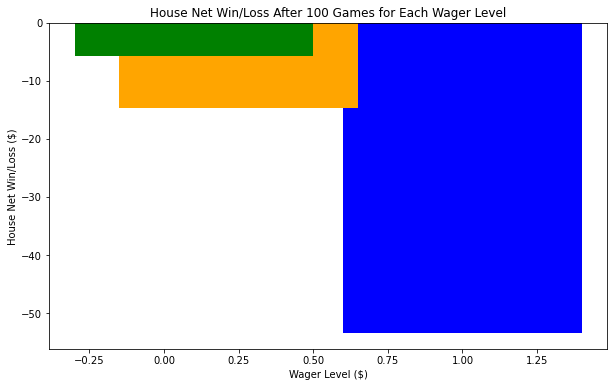

Wager level $1.0: House net win/loss = $-53.47
Wager level $0.25: House net win/loss = $-14.71
Wager level $0.1: House net win/loss = $-5.70


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class InteractiveGuessingGame:
    def __init__(self):
        self.objects = [
            "chalkboard or whiteboard",
            "desks and chairs",
            "textbooks",
            "notebooks or writing pads",
            "pens and pencils",
            "projector",
            "computer",
            "clock",
            "bulletin board",
            "maps or globes"
        ]
        
        self.probabilities = [
            0.95, 0.99, 0.90, 0.95, 0.98,
            0.85, 0.80, 0.95, 0.70, 0.60
        ]

        self.max_attempts = 5
        self.reset_game()

    def reset_game(self):
        self.secret_objects = random.sample(self.objects, self.max_attempts)
        self.secret_probabilities = [self.probabilities[self.objects.index(obj)] for obj in self.secret_objects]
        self.correct_guesses = []

    def play_game(self, wager):
        self.reset_game()
        guessed_items = set()  # Ensure unique guesses
        correct_guesses = 0
        for attempt in range(self.max_attempts):
            guess = np.random.choice(self.objects)
            while guess in guessed_items:  # Ensure the guess is unique
                guess = np.random.choice(self.objects)
            guessed_items.add(guess)
            if guess in self.secret_objects:
                self.correct_guesses.append(guess)
                correct_guesses += 1
        payoff = self.calculate_payoff(wager)
        net_result = payoff - wager  # net win/loss for the player
        return net_result

    def calculate_payoff(self, wager):
        payoff = 0
        weight = 1 / self.max_attempts
        for guess in set(self.correct_guesses):  # Ensure unique correct guesses
            index = self.objects.index(guess)
            prob = self.probabilities[index]
            amount = prob * weight * wager
            payoff += amount
        return payoff

def simulate_games(wager, num_games=100):
    game = InteractiveGuessingGame()
    results = [game.play_game(wager) for _ in range(num_games)]
    net_result = np.sum(results)
    return net_result

# Wager levels
wager_levels = [1.00, 0.25, 0.10]
num_games = 100

# Simulate the games
results = {wager: simulate_games(wager, num_games) for wager in wager_levels}

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Wager Level ($)')
plt.ylabel('House Net Win/Loss ($)')
plt.title(f'House Net Win/Loss After {num_games} Games for Each Wager Level')
plt.show()

# Print detailed results
for wager, result in results.items():
    print(f"Wager level ${wager}: House net win/loss = ${result:.2f}")
